/var/folders/j9/6d49p3x917qf6zpm6bmmypqw0000gn/T/ipykernel_12032/1420517093.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  error.append(math.pow(self.predictor(w,b,X[i]) - Y[i],2))


After performing gradient descent on the data, the value of w is 9332.94473804363 and the value of b is 25609.897997999484


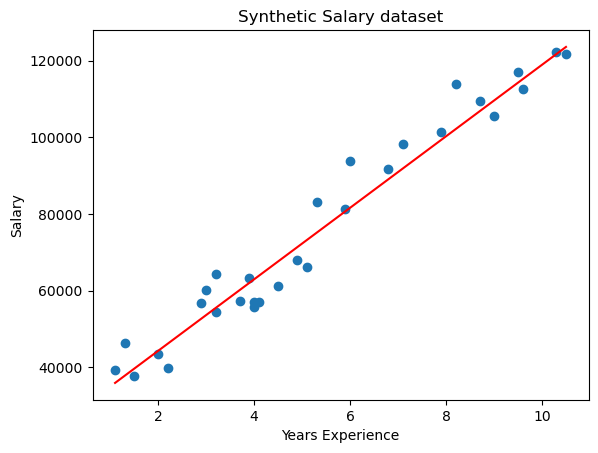

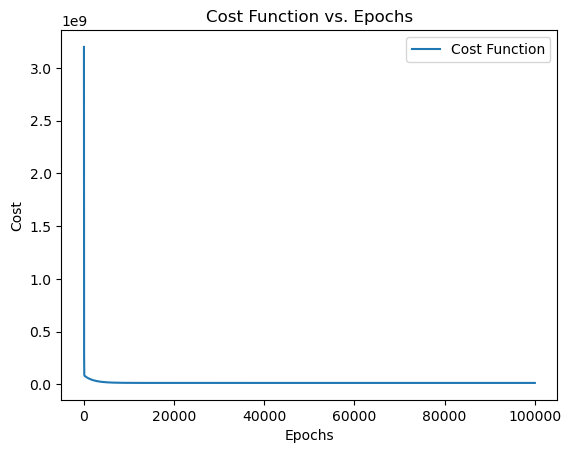

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from sklearn.model_selection import train_test_split

class linear_regressor:

    def __init__(self):
        self.cost_history = [] 

    def predictor(self,w,b,x):
        return w*x + b

    def cost(self,X, Y, w, b):
        error = []
        m = X.shape[0]
        for i in range (0,m):
            error.append(math.pow(self.predictor(w,b,X[i]) - Y[i],2))
        error = np.array(error)
        J = error.sum()/(2*m)
        self.cost_history.append(J)
        return J

    def wderivative(self,X,Y,w,b):
        error=[]
        m = X.shape[0]
        for i in range (0,m):
            error.append((self.predictor(w,b,X[i]) - Y[i])*X[i])

        error = np.array(error)
        wder = error.sum()/m
        return wder

    def bderivative(self,X, Y, w, b):
        error = []
        m = X.shape[0]
        for i in range (0,m):
            error.append(self.predictor(w,b,X[i]) - Y[i])
        error = np.array(error)
        bder = error.sum()/m
        return bder

    def gradient_descent(self,X,Y,w,b,alpha):
        temp_w = w - alpha*self.wderivative(X,Y,w,b)
        temp_b = b - alpha*self.bderivative(X,Y,w,b)

        w = temp_w
        b = temp_b

        return w,b
        

    def train(self,X,Y):
        threshold = 0.000001
        w=0
        b=0
        alpha = 0.001
        c=0
        diff = self.cost(X,Y,w,b)
        while diff>threshold:
            if c==100000:
                break

            if diff<threshold:
                break
                
            w,b = self.gradient_descent(X,Y,w,b,alpha)
            diff = self.cost(X,Y,w,b)
            c+=1

        print(f'After performing gradient descent on the data, the value of w is {w} and the value of b is {b}')
        return w,b

linearegressor = linear_regressor()

dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)


plt.scatter(X,Y)
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.title('Synthetic Salary dataset')
w,b = linearegressor.train(X_train,Y_train)
x_line = np.linspace(min(X),max(X),100)
y_line = w*x_line+b
plt.plot(x_line,y_line,color = 'red' , label = 'Best fit line')
plt.show()

epochs = np.arange(len(linearegressor.cost_history))  # Create epoch indices
plt.plot(epochs, linearegressor.cost_history, label='Cost Function')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function vs. Epochs')
plt.legend()
plt.show()
